In [103]:
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', 50)

%matplotlib inline
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.svm import *
from sklearn.neural_network import *
import numpy as np
from sklearn.metrics import *

import numpy as np

from ast import literal_eval
from sklearn.feature_extraction import FeatureHasher 
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

from category_encoders import *

import matplotlib.pyplot as plt
from sklearn.preprocessing import *


In [104]:
data = pd.read_csv('data_pre_model.csv', index_col = 0)
data

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,IS_EXON,EXON_INTRON,BLOSUM
0,1,1168180,G,C,['not_specified'],1,0,['missense_variant'],MODERATE,B3GALT6,NM_080605.3,0.033481,E,1.0,tolerated,benign,0.321582,1.053,D,0.10020,True,1.000000,2.0
1,1,1470752,G,A,"['Spinocerebellar_ataxia_21', 'not_provided']",1,0,['missense_variant'],MODERATE,TMEM240,NM_001114748.1,0.032646,P,-1.0,deleterious_low_confidence,benign,0.313746,31.000,L,0.00000,True,1.000000,-3.0
3,1,2160305,G,A,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,unknown,unknown,0.217631,22.500,S,0.00000,True,0.142857,0.0
4,1,2160305,G,T,"['Shprintzen', 'Goldberg_syndrome']",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,unknown,unknown,0.217631,24.700,C,0.00000,True,0.142857,-3.0
5,1,2160554,G,C,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.022364,G,1.0,unknown,unknown,0.217631,23.700,R,0.00000,True,0.142857,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,"['Hereditary_factor_VIII_deficiency_disease', ...",1,0,['synonymous_variant'],LOW,F8,NM_000132.3,0.354794,S,-1.0,unknown,unknown,0.001580,0.105,*,0.13923,True,0.538462,NaN
65184,X,154159118,C,T,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,1,['missense_variant'],MODERATE,F8,NM_000132.3,0.270573,V,-1.0,tolerated,benign,0.001580,0.002,I,0.00130,True,0.538462,3.0
65185,X,154194886,C,T,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,0,['synonymous_variant'],LOW,F8,NM_000132.3,0.099651,A,-1.0,unknown,unknown,0.001580,12.850,*,0.01110,True,0.307692,NaN
65186,X,154490187,T,C,"['Non', 'syndromic_X', 'linked_intellectual_di...",1,0,['synonymous_variant'],LOW,RAB39B,NM_171998.2,0.049780,T,-1.0,unknown,unknown,0.255614,0.130,*,0.00030,True,1.000000,NaN


In [105]:
training_data = data.copy()

encode = ["CHROM", "REF", "ALT", "IMPACT", "SYMBOL", "Feature", "Amino_acids", "SIFT", "Amino_acids_target", "PolyPhen"]
# training_data[encode] = training_data[encode].apply(LabelEncoder().fit_transform)
training_data[encode] = CatBoostEncoder(cols=encode).fit_transform(training_data[encode], training_data["CLASS"])
training_data

C:\Users\angel\anaconda3\envs\genetic_variants\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,IS_EXON,EXON_INTRON,BLOSUM
0,0.254438,1168180,0.254438,0.254438,['not_specified'],1,0,['missense_variant'],0.254438,0.254438,0.254438,0.033481,0.254438,1.0,0.254438,0.254438,0.321582,1.053,0.254438,0.10020,True,1.000000,2.0
1,0.127219,1470752,0.127219,0.254438,"['Spinocerebellar_ataxia_21', 'not_provided']",1,0,['missense_variant'],0.127219,0.254438,0.254438,0.032646,0.254438,-1.0,0.254438,0.127219,0.313746,31.000,0.254438,0.00000,True,1.000000,-3.0
3,0.084813,2160305,0.084813,0.127219,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,['missense_variant'],0.084813,0.254438,0.254438,0.006362,0.254438,1.0,0.254438,0.254438,0.217631,22.500,0.254438,0.00000,True,0.142857,0.0
4,0.063609,2160305,0.063609,0.254438,"['Shprintzen', 'Goldberg_syndrome']",33,0,['missense_variant'],0.063609,0.127219,0.127219,0.006362,0.127219,1.0,0.127219,0.127219,0.217631,24.700,0.254438,0.00000,True,0.142857,-3.0
5,0.050888,2160554,0.050888,0.127219,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,['missense_variant'],0.050888,0.084813,0.084813,0.022364,0.084813,1.0,0.084813,0.084813,0.217631,23.700,0.254438,0.00000,True,0.142857,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,0.273764,154158201,0.238140,0.239059,"['Hereditary_factor_VIII_deficiency_disease', ...",1,0,['synonymous_variant'],0.266390,0.036348,0.036348,0.354794,0.236221,-1.0,0.248368,0.248843,0.001580,0.105,0.237290,0.13923,True,0.538462,NaN
65184,0.273606,154159118,0.261164,0.262754,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,1,['missense_variant'],0.264418,0.031805,0.031805,0.270573,0.276207,-1.0,0.264995,0.261609,0.001580,0.002,0.285931,0.00130,True,0.538462,3.0
65185,0.274024,154194886,0.261199,0.262792,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,0,['synonymous_variant'],0.266377,0.139382,0.139382,0.099651,0.265055,-1.0,0.248361,0.248836,0.001580,12.850,0.237278,0.01110,True,0.307692,NaN
65186,0.273867,154490187,0.238113,0.235708,"['Non', 'syndromic_X', 'linked_intellectual_di...",1,0,['synonymous_variant'],0.266365,0.254438,0.254438,0.049780,0.254497,-1.0,0.248354,0.248829,0.255614,0.130,0.237266,0.00030,True,1.000000,NaN


In [106]:
CLNDN_values = set()
data['CLNDN'].apply(literal_eval).apply(lambda x: CLNDN_values.update(x))
CLNDN_values

{'Metabolic_syndrome',
 'Tatton',
 'Sick_sinus_syndrome_2',
 '_B',
 'Medulloblastoma',
 'Amyotrophic_lateral_sclerosis_type_8',
 'Serum_calcium_level',
 'Abnormal_blistering_of_the_skin',
 'Biedl_syndrome_1',
 '_type_B2',
 '_autosomal_recessive_58',
 'GLB1',
 'Sclerosing_cholangitis',
 'Spastic_paraplegia_75',
 'Multiple_epiphyseal_dysplasia_4',
 'Pseudohypoaldosteronism_type_2C',
 '_periventricular',
 'Snyder_Robinson_syndrome',
 '2_POLYMORPHISM',
 '_megalencephaly',
 'Corneal_Dystrophy',
 'linked_mental_retardation_with_marfanoid_habitus_syndrome',
 'Curry',
 'Cone',
 'Megalencephaly',
 '_e',
 'Pulmonary_arterial_hypertension',
 'Cardiac_arrhythmia',
 '3_Methylcrotonyl',
 'Crigler_Najjar_syndrome',
 'Striatal_Degeneration',
 'SUDDEN_INFANT_DEATH_SYNDROME',
 'glycine_amidinotransferase_deficiency',
 'INFLAMMATORY_BOWEL_DISEASE_1_',
 'Hydrocephalus',
 'Hemorrhage',
 'Dilated_cardiomyopathy_1M',
 '_familial_combined',
 '_dominant_intermediate_E',
 '_Transthyretin',
 'Andermann_syndrome'

In [107]:
len(CLNDN_values)

4660

In [108]:
Consequence_values = set()
data['Consequence'].apply(literal_eval).apply(lambda x: Consequence_values.update(x))
Consequence_values

{'2KB_upstream_variant',
 '3_prime_UTR_variant',
 '500B_downstream_variant',
 '5_prime_UTR_variant',
 'intron_variant',
 'intron_variant&non_coding_transcript_variant',
 'missense_variant',
 'nonsense',
 'splice_acceptor_variant',
 'splice_donor_variant',
 'splice_region_variant',
 'splice_region_variant&synonymous_variant',
 'start_lost',
 'start_lost&splice_region_variant',
 'stop_gained',
 'stop_gained&splice_region_variant',
 'synonymous_variant'}

In [109]:
len(Consequence_values)

17

In [110]:
data['CLNDN'].apply(literal_eval).apply(len).mean(), data['Consequence'].apply(literal_eval).apply(len).max()

(3.8658936265783828, 4)

In [111]:
data[data['CLNDN'].apply(literal_eval).apply(len) > 10]

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,IS_EXON,EXON_INTRON,BLOSUM
40,1,12052716,C,T,"['Abnormality_of_the_teeth', 'Microcephaly', '...",1,0,['missense_variant'],MODERATE,MFN2,NM_001127660.1,0.017929,R,1.0,deleterious,probably_damaging,0.017800,34.00,W,0.00000,True,0.166667,-3.0
42,1,12058874,T,C,"['Charcot', 'Marie', 'Tooth_disease', '_axonal...",1,0,['missense_variant'],MODERATE,MFN2,NM_001127660.1,0.041514,F,1.0,deleterious,benign,0.017800,22.90,S,0.00000,True,0.333333,-2.0
137,1,46657799,C,T,"['Congenital_muscular_dystrophy', 'dystroglyca...",1,1,['missense_variant'],MODERATE,POMGNT1,NM_001243766.1,0.096973,V,-1.0,unknown,unknown,0.459000,20.90,I,0.00260,True,0.739130,3.0
147,1,53668099,C,T,['Carnitine_palmitoyltransferase_II_deficiency...,1,0,"['splice_region_variant', 'missense_variant']",MODERATE,CPT2,NM_000098.2,0.021657,S,1.0,deleterious,probably_damaging,0.131000,34.00,L,0.00127,True,0.600000,-2.0
193,1,94463617,C,T,"['MACULAR_DEGENERATION', '_AGE', 'RELATED', '_...",1,0,['missense_variant'],MODERATE,ABCA4,NM_000350.2,0.419510,D,-1.0,tolerated,benign,0.010700,23.10,N,0.00890,True,0.960000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65015,X,153581714,G,A,"['Melnick', 'Needles_syndrome', 'Frontometaphy...",1,0,['missense_variant'],MODERATE,FLNA,NM_001110556.1,0.548402,S,-1.0,deleterious,possibly_damaging,0.000896,25.80,L,0.00250,True,0.770833,-2.0
65046,X,153587999,T,C,"['Aortic_aneurysm', '_familial_thoracic_2', 'M...",1,1,['missense_variant'],MODERATE,FLNA,NM_001110556.1,0.366826,D,-1.0,deleterious,possibly_damaging,0.000896,22.50,G,0.00015,True,0.500000,-1.0
65070,X,153590902,G,A,"['FLNA', 'related_disorder', 'Melnick', 'Needl...",1,1,['missense_variant'],MODERATE,FLNA,NM_001110556.1,0.224835,P,-1.0,deleterious,probably_damaging,0.000896,16.71,S,0.00020,True,0.354167,-1.0
65158,X,153760472,C,T,"['G6PD_ANANT', 'G6PD_DHON', 'G6PD_KAIPING', 'G...",1,0,['missense_variant'],MODERATE,G6PD,XM_005274657.1,0.135929,R,-1.0,unknown,unknown,0.016900,32.00,H,0.00045,True,0.923077,0.0


C:\Users\angel\anaconda3\envs\genetic_variants\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


<AxesSubplot:>

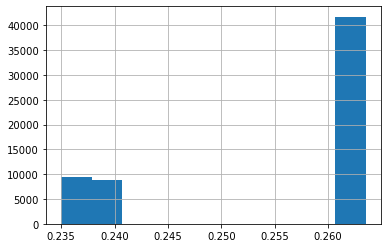

In [112]:
encoder = TargetEncoder(cols=["REF"])
encoder.fit_transform(data.drop(columns="CLASS"), data["CLASS"])["REF"].hist()

<ipython-input-113-e92f891f941f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["Consequence"] = aux["Consequence"].apply(lambda x: 1 if 'nonsense' in x else 0)


<AxesSubplot:>

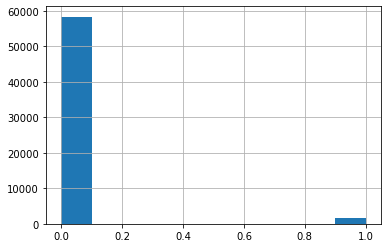

In [113]:
aux = training_data[["Consequence", "CLASS"]]
aux["Consequence"] = aux["Consequence"].apply(lambda x: 1 if 'nonsense' in x else 0)
encoder = TargetEncoder()
encoder.fit_transform(aux["Consequence"], aux["CLASS"])["Consequence"].hist()

In [114]:
training_data["Consequence_values"] = pd.Series(np.zeros(training_data.tail(1).index+1), dtype='float')
training_data["Consequence_cat"] = pd.Series(dtype='bool')
for consequence in Consequence_values:
    training_data["Consequence_cat"] = training_data["Consequence"].apply(lambda x: 1 if consequence in x else 0)
    mean = training_data["Consequence_cat"].sum()/len(training_data["Consequence_cat"])
    training_data["Consequence_wao"] = training_data["Consequence_cat"].apply(lambda x: mean if x == 1 else 0)
    training_data["Consequence_values"] = training_data["Consequence_values"] + training_data["Consequence_wao"]

training_data["Consequence_len"] = training_data["Consequence"].apply(literal_eval).apply(len)
training_data["Consequence"] = training_data["Consequence_values"] / training_data["Consequence_len"]
training_data = training_data.drop(columns=["Consequence_values", "Consequence_cat", "Consequence_wao", "Consequence_len"])
training_data

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,IS_EXON,EXON_INTRON,BLOSUM
0,0.254438,1168180,0.254438,0.254438,['not_specified'],1,0,0.542032,0.254438,0.254438,0.254438,0.033481,0.254438,1.0,0.254438,0.254438,0.321582,1.053,0.254438,0.10020,True,1.000000,2.0
1,0.127219,1470752,0.127219,0.254438,"['Spinocerebellar_ataxia_21', 'not_provided']",1,0,0.542032,0.127219,0.254438,0.254438,0.032646,0.254438,-1.0,0.254438,0.127219,0.313746,31.000,0.254438,0.00000,True,1.000000,-3.0
3,0.084813,2160305,0.084813,0.127219,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,0.542032,0.084813,0.254438,0.254438,0.006362,0.254438,1.0,0.254438,0.254438,0.217631,22.500,0.254438,0.00000,True,0.142857,0.0
4,0.063609,2160305,0.063609,0.254438,"['Shprintzen', 'Goldberg_syndrome']",33,0,0.542032,0.063609,0.127219,0.127219,0.006362,0.127219,1.0,0.127219,0.127219,0.217631,24.700,0.254438,0.00000,True,0.142857,-3.0
5,0.050888,2160554,0.050888,0.127219,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,0.542032,0.050888,0.084813,0.084813,0.022364,0.084813,1.0,0.084813,0.084813,0.217631,23.700,0.254438,0.00000,True,0.142857,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,0.273764,154158201,0.238140,0.239059,"['Hereditary_factor_VIII_deficiency_disease', ...",1,0,0.306044,0.266390,0.036348,0.036348,0.354794,0.236221,-1.0,0.248368,0.248843,0.001580,0.105,0.237290,0.13923,True,0.538462,NaN
65184,0.273606,154159118,0.261164,0.262754,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,1,0.542032,0.264418,0.031805,0.031805,0.270573,0.276207,-1.0,0.264995,0.261609,0.001580,0.002,0.285931,0.00130,True,0.538462,3.0
65185,0.274024,154194886,0.261199,0.262792,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,0,0.306044,0.266377,0.139382,0.139382,0.099651,0.265055,-1.0,0.248361,0.248836,0.001580,12.850,0.237278,0.01110,True,0.307692,NaN
65186,0.273867,154490187,0.238113,0.235708,"['Non', 'syndromic_X', 'linked_intellectual_di...",1,0,0.306044,0.266365,0.254438,0.254438,0.049780,0.254497,-1.0,0.248354,0.248829,0.255614,0.130,0.237266,0.00030,True,1.000000,NaN


In [115]:
training_data

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,IS_EXON,EXON_INTRON,BLOSUM
0,0.254438,1168180,0.254438,0.254438,['not_specified'],1,0,0.542032,0.254438,0.254438,0.254438,0.033481,0.254438,1.0,0.254438,0.254438,0.321582,1.053,0.254438,0.10020,True,1.000000,2.0
1,0.127219,1470752,0.127219,0.254438,"['Spinocerebellar_ataxia_21', 'not_provided']",1,0,0.542032,0.127219,0.254438,0.254438,0.032646,0.254438,-1.0,0.254438,0.127219,0.313746,31.000,0.254438,0.00000,True,1.000000,-3.0
3,0.084813,2160305,0.084813,0.127219,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,0.542032,0.084813,0.254438,0.254438,0.006362,0.254438,1.0,0.254438,0.254438,0.217631,22.500,0.254438,0.00000,True,0.142857,0.0
4,0.063609,2160305,0.063609,0.254438,"['Shprintzen', 'Goldberg_syndrome']",33,0,0.542032,0.063609,0.127219,0.127219,0.006362,0.127219,1.0,0.127219,0.127219,0.217631,24.700,0.254438,0.00000,True,0.142857,-3.0
5,0.050888,2160554,0.050888,0.127219,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,0.542032,0.050888,0.084813,0.084813,0.022364,0.084813,1.0,0.084813,0.084813,0.217631,23.700,0.254438,0.00000,True,0.142857,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,0.273764,154158201,0.238140,0.239059,"['Hereditary_factor_VIII_deficiency_disease', ...",1,0,0.306044,0.266390,0.036348,0.036348,0.354794,0.236221,-1.0,0.248368,0.248843,0.001580,0.105,0.237290,0.13923,True,0.538462,NaN
65184,0.273606,154159118,0.261164,0.262754,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,1,0.542032,0.264418,0.031805,0.031805,0.270573,0.276207,-1.0,0.264995,0.261609,0.001580,0.002,0.285931,0.00130,True,0.538462,3.0
65185,0.274024,154194886,0.261199,0.262792,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,0,0.306044,0.266377,0.139382,0.139382,0.099651,0.265055,-1.0,0.248361,0.248836,0.001580,12.850,0.237278,0.01110,True,0.307692,NaN
65186,0.273867,154490187,0.238113,0.235708,"['Non', 'syndromic_X', 'linked_intellectual_di...",1,0,0.306044,0.266365,0.254438,0.254438,0.049780,0.254497,-1.0,0.248354,0.248829,0.255614,0.130,0.237266,0.00030,True,1.000000,NaN


In [116]:
training_data["CLNDN_values"] = pd.Series(np.zeros(training_data.tail(1).index+1), dtype='float')
training_data["CLNDN_cat"] = pd.Series(dtype='bool')
for clndn in CLNDN_values:
    print(clndn)
    training_data["CLNDN_cat"] = training_data["CLNDN"].apply(lambda x: 1 if clndn in x else 0)
    mean = training_data["CLNDN_cat"].sum()/len(training_data["CLNDN_cat"])
    training_data["CLNDN_wao"] = training_data["CLNDN_cat"].apply(lambda x: mean if x == 1 else 0)
    training_data["CLNDN_values"] = training_data["CLNDN_values"] + training_data["CLNDN_wao"]

training_data["CLNDN_len"] = training_data["CLNDN"].apply(literal_eval).apply(len)
training_data["CLNDN"] = training_data["CLNDN_values"] / training_data["CLNDN_len"]
training_data = training_data.drop(columns=["CLNDN_values", "CLNDN_len", "CLNDN_cat", "CLNDN_wao"])
training_data

Metabolic_syndrome
Tatton
Sick_sinus_syndrome_2
_B
Medulloblastoma
Amyotrophic_lateral_sclerosis_type_8
Serum_calcium_level
Abnormal_blistering_of_the_skin
Biedl_syndrome_1
_type_B2
_autosomal_recessive_58
GLB1
Sclerosing_cholangitis
Spastic_paraplegia_75
Multiple_epiphyseal_dysplasia_4
Pseudohypoaldosteronism_type_2C
_periventricular
Snyder_Robinson_syndrome
2_POLYMORPHISM
_megalencephaly
Corneal_Dystrophy
linked_mental_retardation_with_marfanoid_habitus_syndrome
Curry
Cone
Megalencephaly
_e
Pulmonary_arterial_hypertension
Cardiac_arrhythmia
3_Methylcrotonyl
Crigler_Najjar_syndrome
Striatal_Degeneration
SUDDEN_INFANT_DEATH_SYNDROME
glycine_amidinotransferase_deficiency
INFLAMMATORY_BOWEL_DISEASE_1_
Hydrocephalus
Hemorrhage
Dilated_cardiomyopathy_1M
_familial_combined
_dominant_intermediate_E
_Transthyretin
Andermann_syndrome
Larsen_syndrome
_type_4B1
Meckel_syndrome_type_2
Lymphoproliferative_syndrome_1
Pontocerebellar_hypoplasia
like_syndrome_2
like_syndrome
Ventricular_septal_defect

Moyamoya_disease
Roussy
Oral
_ARX
Lumbar_disc_herniation
Epidermal_nevus
_19
_type_2r
Rasopathy
Cutaneous_malignant_melanoma_3
Peroxisome_biogenesis_disorder_3A
Hemophilia_A
Postanesthetic_apnea
cholesterol_lipidosis
_complementation_group_K
Retinitis_pigmentosa_66
_type_1f
Spastic_ataxia_Charlevoix
_4a
Glycogen_storage_disease_II
Fabry_disease
ALA213
Jakob_disease
tetrahydropterin_synthase_deficiency
_and_diabetes_syndrome
Iron_Overload
Niemann
_type_4f
Haemorrhagic_telangiectasia_1
Familial_hypertrophic_cardiomyopathy_13
Aneurysm
Fanconi_Anemia
_with_spastic_paraplegia
Peripheral_visual_field_loss
Hepatic_methionine_adenosyltransferase_deficiency
Common_variable_immunodeficiency_2
_type_1G
Infantile_myofibromatosis
Common_variable_immunodeficiency_1
Breast_adenocarcinoma
_demyelinating
Hyperinsulinemia
Immunodeficiency_18
Ovarioleukodystrophy
_type_5
Bowing_of_the_long_bones
Severe_combined_immunodeficiency_due_to_ADA_deficiency
or_bone_marrow_failure
Immunodeficiency_with_Hyper
Ring

RELATED
Sarcoidosis
Decreased_activity_of_the_pyruvate_dehydrogenase_complex
PI_CHRISTCHURCH
Common_Variable_Immune_Deficiency
_37
Gruber_syndrome
Thanatophoric_dysplasia_type_1
_acetazolamide
Multiple_mitochondrial_dysfunctions_syndrome_3
Spinal_muscular_atrophy
Splenomegaly
_and_urinary_abnormalities
Torré_syndrome
Transitional_cell_carcinoma_of_the_bladder
methylglutaconic_aciduria_with_cataracts
Primary_ciliary_dyskinesia_25
Dreifuss_muscular_dystrophy_5
thalassemia
Severe_congenital_neutropenia
_autosomal_recessive_7
_psychomotor_retardation
Joubert_syndrome_2
Delayed_gross_motor_development
Congenital_disorder_of_glycosylation_type_1P
Pudlak_syndrome
Neoplasm_of_the_breast
related_small_fiber_neuropathy
_autosomal_dominant_2b
Leber_congenital_amaurosis_1
Pendred
_hereditary_sensory_and_autonomic
_complementation_group_U
Cowchock_syndrome
_and_Electrolyte_Imbalance_Syndrome
GATA
Tooth_disease_type_2C
Sachs_disease
hand_syndrome
Abnormality_of_the_teeth
Fracture
Mental_retardation


Vitreoretinopathy
Merkel_cell_skin_cancer
Primary_autosomal_recessive_microcephaly_7
rib_polydactyly_syndrome_type_III
Mutilating_keratoderma
hydroxyisobutyryl
Mitochondrial_trifunctional_protein_deficiency
_centronuclear
Iodotyrosyl_coupling_defect
VACTERL_association_with_hydrocephalus
_autosomal_dominant_12
Hypokalemic_periodic_paralysis_1
Combined_oxidative_phosphorylation_deficiency_8
_autosomal_dominant_20
related
MYH
girdle
Hidrotic_ectodermal_dysplasia_syndrome
Amelogenesis_Imperfecta
Medullary_thyroid_carcinoma
Myocardial_infarction
Telangiectasia
Joubert_syndrome_20
Hereditary_nonpolyposis_colorectal_cancer_type_7
Porokeratosis
Infantile_GM1_gangliosidosis
Dreifuss_muscular_dystrophy_3
Jarcho
TRAPS
Atelosteogenesis
Silver_spastic_paraplegia_syndrome
_complementation_group_A
Amyotrophic_lateral_sclerosis_17
dystonia
Koolen
Arteriohepatic_dysplasia
Immunodeficiency_28
Visual_impairment
Stargardt_disease
Afibrinogenemia
PI_I
CEP290
_hearing_loss
Sacral_agenesis
Spinal_Muscular_A

_congenital_nonprogressive
Coffin
Multiminicore_Disease
Nephronophthisis_1
Factor_XII_deficiency_disease
_bilateral_frontoparietal
Familial_partial_lipodystrophy_2
resistant_nephrotic_syndrome
Spastic_paraplegia_28
Paramyotonia_congenita_of_von_Eulenburg
G6PD_MODENA
Early_myoclonic_encephalopathy
Retinitis_Pigmentosa
Joubert_syndrome
SERUM_HDL_CHOLESTEROL_LEVEL
Cornelia_de_Lange_syndrome_1
Immunodeficiency_36
Connective_tissue_disorder
Neural_tube_defect
Achalasia
Carcinoid_tumor_of_intestine
Immunodeficiency_26_with_or_without_neurologic_abnormalities
Rothmund
Methylmalonate_semialdehyde_dehydrogenase_deficiency
Dilated_cardiomyopathy_1DD
Van_Laere_syndrome_1
Leukemia
_pulmonary
_dysarthria
Creatine_phosphokinase
Holoprosencephaly_11
_SUSCEPTIBILITY_TO
Finnish_congenital_nephrotic_syndrome
Maple_syrup_urine_disease_type_1A
Zellweger_syndrome
Needles_syndrome
Common_variable_immunodeficiency_7
3_toe_syndactyly
Congenital_defect_of_folate_absorption
Early_infantile_epileptic_encephalopa

Progressive_External_Ophthalmoplegia_with_Mitochondrial_DNA_Deletions
Joubert_syndrome_17
linked_3
Cataplexy
Kosaki_syndrome
Dilated_cardiomyopathy_1V
Glycogen_storage_disease_0
KCNE2
Corneal_fragility_keratoglobus
Carnitine_palmitoyltransferase_II_deficiency
Hereditary_angioneurotic_edema_with_normal_C1_esterase_inhibitor_activity
_type_8
IgE_syndrome
Infantile_muscular_hypotonia
Inflammatory_bowel_disease_1
Nemaline_myopathy_6
Nonarteritic_anterior_ischemic_optic_neuropathy
Arthrogryposis
Kindler
Pontocerebellar_hypoplasia_type_8
Chronic_lymphocytic_leukemia
rod_dystrophy_6
_47
von_Willebrand_disease_type_1
Netherton_syndrome
Generalized_epilepsy_with_febrile_seizures_plus
Combined_malonic_and_methylmalonic_aciduria
Aplastic_anemia
Premature_ovarian_failure_5
Familial_hemiplegic_migraine_type_2
_Juvenile
linked_recessive
_protection_against
Progressive_myositis_ossificans
Abnormality_of_macular_pigmentation
MCC_Deficiency
_and_palmoplantar_keratoderma_syndrome
Deficiency_of_pyrroline

BEST1
uremic_syndrome_3
_member_9
Oligodontia
Leber_congenital_amaurosis_2
brachydactyly_syndrome
Factor_X_deficiency
Spongy_degeneration_of_central_nervous_system
Haemorrhagic_telangiectasia_2
Hajdu
Brain_atrophy
_autosomal_recessive_form
Ornithine_aminotransferase_deficiency
Anorexia_nervosa_2
_susceptibility_to
AIPL1
_autosomal
Periodontitis
Long_QT_syndrome_15
Hypoparathyroidism_familial_isolated
de_Vries_syndrome
ARAB
Acromesomelic_dysplasia
Myotilinopathy
Spinocerebellar_Ataxia
Familial_hypertrophic_cardiomyopathy_16
Leprechaunism_syndrome
HYPERHOMOCYSTEINEMIA
Dysferlinopathy
Non
Kallmann_syndrome_3
Tachycardia
autism_syndrome
stimulating_hormone_deficiency
Renal_dysplasia
_eye
Familial_visceral_amyloidosis
ERCC6
Glioma_susceptibility_3
Oromandibular
BCS1L
G6PD_CANTON
White_syndrome
Omodysplasia
von_Willebrand_disease_type_2N
_type_2E
Hereditary_Paraganglioma
_Stereotypic_Movements
Multiple_endocrine_neoplasia
CoA_racemase_deficiency
HEMOGLOBIN_EGYPT
Retinitis_pigmentosa_71
_auto

Methylmalonyl
Congenital_diaphragmatic_hernia
Ectodermal_dysplasia_11a
_optic_nerve_atrophy
Von_Hippel
Dyskeratosis_congenita
Cardiomyopathy_dilated_with_woolly_hair_and_keratoderma
IFAP_syndrome_with_or_without_BRESHECK_syndrome
Dystrophic_epidermolysis_bullosa
Associated_Polyposis_Disorders
Pol_III
Hereditary_coproporphyria
Cowden_syndrome_7
Combined_molybdoflavoprotein_enzyme_deficiency
Sotos_Syndrome
Colorectal_adenoma
CoA_acetoacetate_transferase_deficiency
_and_alkalosis
Thrombophilia
Atrial_septal_defect_3
USH2A
Adenocarcinoma_of_prostate
_autosomal_dominant_32
dystroglycanopathy_with_mental_retardation
CARBONIC_ANHYDRASE_II_VARIANT
Native_American_myopathy
_nonepidermolytic
Brain_iron_accummulation
_autosomal_recessive_37
Laminin_alpha_2
Congenital_disorder_of_glycosylation_type_1B
_with_or_without_vestibular_involvement
Congenital_disorder_of_glycosylation_type_1I
Oculocutaneous_albinism_type_1
_visceral
Keratoconus
_with_autoimmunity
Interleukin_2_receptor
Leber_congenital_am

_benign_familial_microcytic
Gastrointestinal_polyposis
_type_B3
Breast_and
Homocysteinemia_due_to_MTHFR_deficiency
_type_A7
Vesicoureteral_reflux
Isolated_Hyperparathyroidism
Susceptibility_to_malaria
_with_focally_folded_myelin_sheaths
Memory_impairment
Fraumeni
Decreased_muscle_mass
Immunodeficiency_30
Catecholaminergic_polymorphic_ventricular_tachycardia
Aortic_aneurysm
HAKKA
Nemaline_myopathy_2
Toe_syndactyly
Luscan
Autosomal_dominant_hypophosphatemic_rickets
Generalized_hypopigmentation
Spondyloenchondrodysplasia_with_immune_dysregulation
Familial_cardiomyopathy
Spastic_paraplegia_30
Familial_hypertrophic_cardiomyopathy_18
Gait_disturbance
ABCB4
Parkinson_disease_5
Wide_intermamillary_distance
Irido
Glucose_transporter_type_1_deficiency_syndrome
Paragangliomas_5
positive_oculocutaneous_albinism
Methylmalonic_aciduria_due_to_methylmalonyl
Sensory_ataxic_neuropathy
Long_QT_syndrome_10
CEP152
Periventricular_Heterotopia
_biotin
Macrothrombocytopenia_and_progressive_sensorineural_deaf

Cataract_and_cardiomyopathy
Myopathy_with_tubular_aggregates
_and_mental_retardation_syndrome
_chronic
Dystonia_27
Horseshoe_kidney
_Thalassemia
_complementation_group_J
Nemaline_myopathy
Acute_megakaryoblastic_leukemia
linked_dominant
Argininosuccinate_lyase_deficiency
Hemivertebrae
Metaphyseal_anadysplasia
Microphthalmia_syndromic_3
_complementation_group_I
_Familial_Form
Lissencephaly_3
Scapuloperoneal_syndrome
mitochondrial_3
Absent_speech
Premature_ovarian_failure
TP63
_female
Progressive_myoclonic_epilepsy
Optic_glioma
Brain_tumor
Primary_Microcephaly_2_With_or_Without_Cortical_Malformations
Acyl
Tumor_susceptibility_linked_to_germline_BAP1_mutations
Takenouchi
Hereditary_nonpolyposis_colorectal_cancer_type_4
Choroidal_Dystrophy
_type_2B
Orofacial
ELP2
Arylsulfatase_a
nail_type
_aniridia
_follicular
MYH9
Chronic_infantile_neurological
Congenital_generalized_lipodystrophy_type_1
Kallmann_syndrome_6
Nonsyndromic_hearing_loss_and_deafness
_CLASSIC
Arterial_tortuosity_syndrome
Famili

Skeletal_dysplasia
_association_with
Platelet_glycoprotein_IV_deficiency
Atypical_Rett_syndrome
_lymphedema
Ovarian_cancer
Congenital_ocular_coloboma
or_ovarian_cancer
Stickler_syndrome
Inosine_triphosphatase_deficiency
_and_Ear_Anomalies_
set
Ceroid_lipofuscinosis_neuronal_2
rib_thoracic_dysplasia_13_with_or_without_polydactyly
_type_A
negative
Aortic_dilatation
Retinitis_pigmentosa_26
Spontaneous_pneumothorax
Epidermolysis_bullosa_dystrophica_inversa
Combined_deficiency_of_sialidase_AND_beta_galactosidase
Hereditary_sensory_neuropathy_type_1D
Hoover
_familial_infantile
_type_1A
_TYPE_VIB
2
Muscular_hypotonia
Immunoglobulin_A_deficiency_2
Congenital_disorder_of_glycosylation_type_1E
Pyruvate_carboxylase_deficiency
Sotos_syndrome_2
Episodic_ataxia
Syndactyly
Bickel_syndrome
Alexander
Related_Cancer_Susceptibility
Colorectal_adenomatous_polyposis
Abortive_cerebellar_ataxia
Alpha
Hypogonadotropic_hypogonadism_18_with_anosmia
_type_2L
_primary
Brachydactyly
Macular_dystrophy_with_central_

Pontocerebellar_hypoplasia_type_2B
Congenital_omphalocele
Multiple_epiphyseal_dysplasia_1
Erythrocytosis
Caspase
PRKAG2_cardiac_syndrome
Paragangliomas_2
Dilated_cardiomyopathy_1EE
Mitochondrial_short
GM1_gangliosidosis
_dominant_type
_and_tooth_agenesis
CARDIFF
Hyperparathyroidism
Hopkins_syndrome
Kenny
Severe_congenital_neutropenia_X
Pierson_syndrome
dystroglycanopathy_with_brain_and_eye_anomalies_type_A5
Congenital_cerebellar_hypoplasia
Hereditary_angioneurotic_edema
Combined_Pituitary_Hormone_Deficiency
Neutropenia
Bietti_crystalline_corneoretinal_dystrophy
Spherocytosis_type_5
Aniridia_1
White_pattern
Optic_atrophy
Dystonia_9
_Type_III_Alpha
Barakat_syndrome
_29
Passarge_syndrome
Child_syndrome
Primary_autosomal_recessive_microcephaly_3
_31
Chondrodysplasia_punctata_1
Stargardt_disease_4
Atrioventricular_septal_defect
_SHORT_STATURE
Alternating_hemiplegia_of_childhood_2
Wilms_Tumor
Pseudoinflammatory_fundus_dystrophy
Spastic_paraplegia_33
Methylglutaconic_aciduria_type_3
Sjögren_s

Danlos_syndrome
Tuberous_sclerosis_and_lymphangiomyomatosis
shorter
Fukuyama_congenital_muscular_dystrophy
ALS2
Mononeuropathy_of_the_Median_Nerve
Brugada_syndrome_6
rib_thoracic_dysplasia_3_with_or_without_polydactyly
hydroxyglutaric_aciduria
ALAD
Fraser_syndrome
Microcytic_anemia
Acid_alpha
_with_psychomotor_retardation_and_characteristic_facies_3
Transient_myeloproliferative_disorder_of_Down_syndrome
_Factor_IX_Deficiency
Ghosal_hematodiaphyseal_syndrome
Arthrogryposis_multiplex_congenita_distal_type_1
predisposing_syndrome
Hirschsprung_disease_2
F
Schuurs
Hemiparesis
_blond_hair
Bixler_syndrome_without_genital_anomalies_or_disordered_steroidogenesis
Dementia
cell_anergy
Bull
Emery
Spastic_paraplegia_10
Meckel_syndrome_type_1
Monogenic_diabetes
dependent_diabetes_mellitus
DLD
Fibrochondrogenesis
_Spectrum_Disorders
Macular_corneal_dystrophy_Type_I
Early_repolarization_associated_with_ventricular_fibrillation
girdle_muscular_dystrophy
_isolated_4
Congenital_heart_disease
_dilated
G6P

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,IS_EXON,EXON_INTRON,BLOSUM
0,0.254438,1168180,0.254438,0.254438,1.714685,1,0,0.542032,0.254438,0.254438,0.254438,0.033481,0.254438,1.0,0.254438,0.254438,0.321582,1.053,0.254438,0.10020,True,1.000000,2.0
1,0.127219,1470752,0.127219,0.254438,1.005440,1,0,0.542032,0.127219,0.254438,0.254438,0.032646,0.254438,-1.0,0.254438,0.127219,0.313746,31.000,0.254438,0.00000,True,1.000000,-3.0
3,0.084813,2160305,0.084813,0.127219,0.518053,33,0,0.542032,0.084813,0.254438,0.254438,0.006362,0.254438,1.0,0.254438,0.254438,0.217631,22.500,0.254438,0.00000,True,0.142857,0.0
4,0.063609,2160305,0.063609,0.254438,0.682610,33,0,0.542032,0.063609,0.127219,0.127219,0.006362,0.127219,1.0,0.127219,0.127219,0.217631,24.700,0.254438,0.00000,True,0.142857,-3.0
5,0.050888,2160554,0.050888,0.127219,0.518053,33,0,0.542032,0.050888,0.084813,0.084813,0.022364,0.084813,1.0,0.084813,0.084813,0.217631,23.700,0.254438,0.00000,True,0.142857,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,0.273764,154158201,0.238140,0.239059,0.673689,1,0,0.306044,0.266390,0.036348,0.036348,0.354794,0.236221,-1.0,0.248368,0.248843,0.001580,0.105,0.237290,0.13923,True,0.538462,NaN
65184,0.273606,154159118,0.261164,0.262754,0.888708,1,1,0.542032,0.264418,0.031805,0.031805,0.270573,0.276207,-1.0,0.264995,0.261609,0.001580,0.002,0.285931,0.00130,True,0.538462,3.0
65185,0.274024,154194886,0.261199,0.262792,0.888708,1,0,0.306044,0.266377,0.139382,0.139382,0.099651,0.265055,-1.0,0.248361,0.248836,0.001580,12.850,0.237278,0.01110,True,0.307692,NaN
65186,0.273867,154490187,0.238113,0.235708,0.530278,1,0,0.306044,0.266365,0.254438,0.254438,0.049780,0.254497,-1.0,0.248354,0.248829,0.255614,0.130,0.237266,0.00030,True,1.000000,NaN


In [117]:
training_data_without_amino = training_data.dropna()
ones = training_data_without_amino[training_data_without_amino["CLASS"] == 1]
zeros =  training_data_without_amino[training_data_without_amino["CLASS"] == 0]
training_data_without_amino

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,IS_EXON,EXON_INTRON,BLOSUM
0,0.254438,1168180,0.254438,0.254438,1.714685,1,0,0.542032,0.254438,0.254438,0.254438,0.033481,0.254438,1.0,0.254438,0.254438,0.321582,1.053,0.254438,0.1002,True,1.000000,2.0
1,0.127219,1470752,0.127219,0.254438,1.005440,1,0,0.542032,0.127219,0.254438,0.254438,0.032646,0.254438,-1.0,0.254438,0.127219,0.313746,31.000,0.254438,0.0000,True,1.000000,-3.0
3,0.084813,2160305,0.084813,0.127219,0.518053,33,0,0.542032,0.084813,0.254438,0.254438,0.006362,0.254438,1.0,0.254438,0.254438,0.217631,22.500,0.254438,0.0000,True,0.142857,0.0
4,0.063609,2160305,0.063609,0.254438,0.682610,33,0,0.542032,0.063609,0.127219,0.127219,0.006362,0.127219,1.0,0.127219,0.127219,0.217631,24.700,0.254438,0.0000,True,0.142857,-3.0
5,0.050888,2160554,0.050888,0.127219,0.518053,33,0,0.542032,0.050888,0.084813,0.084813,0.022364,0.084813,1.0,0.084813,0.084813,0.217631,23.700,0.254438,0.0000,True,0.142857,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65172,0.273557,153763492,0.238054,0.235657,0.276037,1,1,0.542032,0.264381,0.089603,0.089603,0.042708,0.245354,-1.0,0.248367,0.248842,0.016900,0.037,0.253847,0.0946,True,0.384615,1.0
65175,0.273819,153995295,0.261154,0.262743,0.635118,1,1,0.542032,0.264404,0.127219,0.127219,0.043259,0.262434,1.0,0.264082,0.262995,0.319272,25.900,0.294804,0.0000,True,0.400000,-3.0
65176,0.274238,153997446,0.235041,0.235730,0.678210,1,0,0.542032,0.264426,0.418146,0.418146,0.071179,0.238304,1.0,0.264147,0.261628,0.313984,23.100,0.263443,0.0000,True,0.600000,-2.0
65184,0.273606,154159118,0.261164,0.262754,0.888708,1,1,0.542032,0.264418,0.031805,0.031805,0.270573,0.276207,-1.0,0.264995,0.261609,0.001580,0.002,0.285931,0.0013,True,0.538462,3.0


In [118]:
zeros = zeros.sample(n=len(ones))

In [119]:
training_data_without_amino = pd.concat([ones, zeros])
training_data_without_amino

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,IS_EXON,EXON_INTRON,BLOSUM
8,0.031805,3347452,0.042406,0.084813,0.843396,1,1,0.542032,0.031805,0.084813,0.084813,0.212261,0.254438,1.0,0.042406,0.042406,0.101000,11.360,0.254438,0.00300,True,0.882353,1.0
10,0.125444,5926503,0.156805,0.250888,0.902851,1,1,0.542032,0.125444,0.127219,0.127219,0.229612,0.254438,-1.0,0.127219,0.254438,0.021000,26.100,0.254438,0.00190,True,0.866667,-3.0
11,0.204949,5927943,0.250493,0.375740,0.634420,1,1,0.542032,0.204949,0.418146,0.418146,0.213868,0.254438,-1.0,0.127219,0.063609,0.021000,6.773,0.254438,0.00359,True,0.800000,0.0
19,0.171286,5965455,0.036348,0.031805,0.620445,5,1,0.542032,0.171286,0.204949,0.204949,0.118951,0.127219,-1.0,0.179205,0.313609,0.021000,23.300,0.254438,0.01026,True,0.500000,1.0
21,0.202592,5965833,0.250341,0.361604,0.634420,1,1,0.542032,0.202592,0.250341,0.250341,0.104171,0.084813,-1.0,0.179205,0.139382,0.021000,11.120,0.084813,0.00260,True,0.466667,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28814,0.326683,7579580,0.262222,0.272467,0.605570,1,0,0.190737,0.275601,0.348642,0.348642,0.010024,0.287981,-1.0,0.270214,0.264110,0.000965,1.778,0.281323,0.00000,True,0.363636,-1.0
32841,0.229553,63554020,0.233712,0.232101,0.573170,1,0,0.542032,0.267204,0.205321,0.205321,0.067896,0.260435,-1.0,0.267758,0.261567,0.224000,11.540,0.253825,0.00000,True,0.181818,2.0
14723,0.261170,108123582,0.276068,0.238585,0.571166,1,0,0.542032,0.283960,0.147107,0.147107,0.116015,0.255899,1.0,0.281950,0.340168,0.782000,23.600,0.282088,0.00000,True,0.190476,1.0
33134,0.234100,78079689,0.258365,0.264910,0.611545,1,0,0.542032,0.267695,0.301008,0.301008,0.064965,0.261047,1.0,0.269365,0.271161,0.031500,24.500,0.285188,0.00021,True,0.150000,1.0


In [120]:
X, y = training_data_without_amino.drop(columns="CLASS"), training_data_without_amino["CLASS"] 

In [121]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

In [122]:
X

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,IS_EXON,EXON_INTRON,BLOSUM
8,0.031805,3347452,0.042406,0.084813,0.843396,1,0.542032,0.031805,0.084813,0.084813,0.212261,0.254438,1.0,0.042406,0.042406,0.101000,11.360,0.254438,0.00300,True,0.882353,1.0
10,0.125444,5926503,0.156805,0.250888,0.902851,1,0.542032,0.125444,0.127219,0.127219,0.229612,0.254438,-1.0,0.127219,0.254438,0.021000,26.100,0.254438,0.00190,True,0.866667,-3.0
11,0.204949,5927943,0.250493,0.375740,0.634420,1,0.542032,0.204949,0.418146,0.418146,0.213868,0.254438,-1.0,0.127219,0.063609,0.021000,6.773,0.254438,0.00359,True,0.800000,0.0
19,0.171286,5965455,0.036348,0.031805,0.620445,5,0.542032,0.171286,0.204949,0.204949,0.118951,0.127219,-1.0,0.179205,0.313609,0.021000,23.300,0.254438,0.01026,True,0.500000,1.0
21,0.202592,5965833,0.250341,0.361604,0.634420,1,0.542032,0.202592,0.250341,0.250341,0.104171,0.084813,-1.0,0.179205,0.139382,0.021000,11.120,0.084813,0.00260,True,0.466667,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28814,0.326683,7579580,0.262222,0.272467,0.605570,1,0.190737,0.275601,0.348642,0.348642,0.010024,0.287981,-1.0,0.270214,0.264110,0.000965,1.778,0.281323,0.00000,True,0.363636,-1.0
32841,0.229553,63554020,0.233712,0.232101,0.573170,1,0.542032,0.267204,0.205321,0.205321,0.067896,0.260435,-1.0,0.267758,0.261567,0.224000,11.540,0.253825,0.00000,True,0.181818,2.0
14723,0.261170,108123582,0.276068,0.238585,0.571166,1,0.542032,0.283960,0.147107,0.147107,0.116015,0.255899,1.0,0.281950,0.340168,0.782000,23.600,0.282088,0.00000,True,0.190476,1.0
33134,0.234100,78079689,0.258365,0.264910,0.611545,1,0.542032,0.267695,0.301008,0.301008,0.064965,0.261047,1.0,0.269365,0.271161,0.031500,24.500,0.285188,0.00021,True,0.150000,1.0


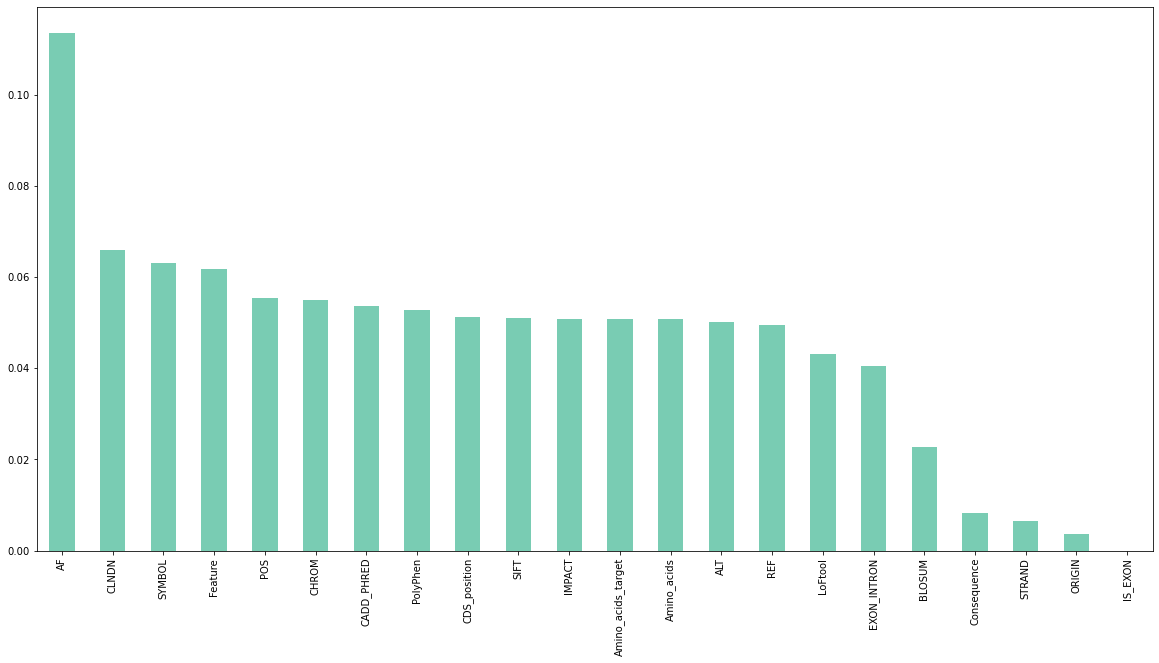

In [123]:
clc = RandomForestClassifier()
clc.fit(train_X, train_y)
features = train_X.columns
importances = clc.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20,10))
feat_importances = pd.Series(importances, index=features)
feat_importances.nlargest(len(indices)).plot(kind='bar',color = '#79CCB3');

In [124]:
f1_score(train_y, clc.predict(train_X))

1.0

In [125]:
f1_score(test_y, clc.predict(test_X)), accuracy_score(test_y, clc.predict(test_X))

(0.6988636363636364, 0.689695550351288)

In [126]:
confusion_matrix(test_y, clc.predict(test_X))

array([[1126,  582],
       [ 478, 1230]], dtype=int64)

In [127]:
importances

array([0.05499755, 0.05527825, 0.04957168, 0.05020303, 0.06599326,
       0.00356995, 0.00830781, 0.05088945, 0.06306464, 0.06168633,
       0.051195  , 0.05072765, 0.00645262, 0.05109792, 0.05268076,
       0.04318314, 0.05356076, 0.05076954, 0.11354056, 0.        ,
       0.04042284, 0.02280726])

In [128]:
feature_importance = features[importances > 0.04]

In [129]:
X = training_data_without_amino[feature_importance]

In [130]:
X

,CHROM,POS,REF,ALT,CLNDN,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,EXON_INTRON
8,0.031805,3347452,0.042406,0.084813,0.843396,0.031805,0.084813,0.084813,0.212261,0.254438,0.042406,0.042406,0.101000,11.360,0.254438,0.00300,0.882353
10,0.125444,5926503,0.156805,0.250888,0.902851,0.125444,0.127219,0.127219,0.229612,0.254438,0.127219,0.254438,0.021000,26.100,0.254438,0.00190,0.866667
11,0.204949,5927943,0.250493,0.375740,0.634420,0.204949,0.418146,0.418146,0.213868,0.254438,0.127219,0.063609,0.021000,6.773,0.254438,0.00359,0.800000
19,0.171286,5965455,0.036348,0.031805,0.620445,0.171286,0.204949,0.204949,0.118951,0.127219,0.179205,0.313609,0.021000,23.300,0.254438,0.01026,0.500000
21,0.202592,5965833,0.250341,0.361604,0.634420,0.202592,0.250341,0.250341,0.104171,0.084813,0.179205,0.139382,0.021000,11.120,0.084813,0.00260,0.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28814,0.326683,7579580,0.262222,0.272467,0.605570,0.275601,0.348642,0.348642,0.010024,0.287981,0.270214,0.264110,0.000965,1.778,0.281323,0.00000,0.363636
32841,0.229553,63554020,0.233712,0.232101,0.573170,0.267204,0.205321,0.205321,0.067896,0.260435,0.267758,0.261567,0.224000,11.540,0.253825,0.00000,0.181818
14723,0.261170,108123582,0.276068,0.238585,0.571166,0.283960,0.147107,0.147107,0.116015,0.255899,0.281950,0.340168,0.782000,23.600,0.282088,0.00000,0.190476
33134,0.234100,78079689,0.258365,0.264910,0.611545,0.267695,0.301008,0.301008,0.064965,0.261047,0.269365,0.271161,0.031500,24.500,0.285188,0.00021,0.150000


In [131]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

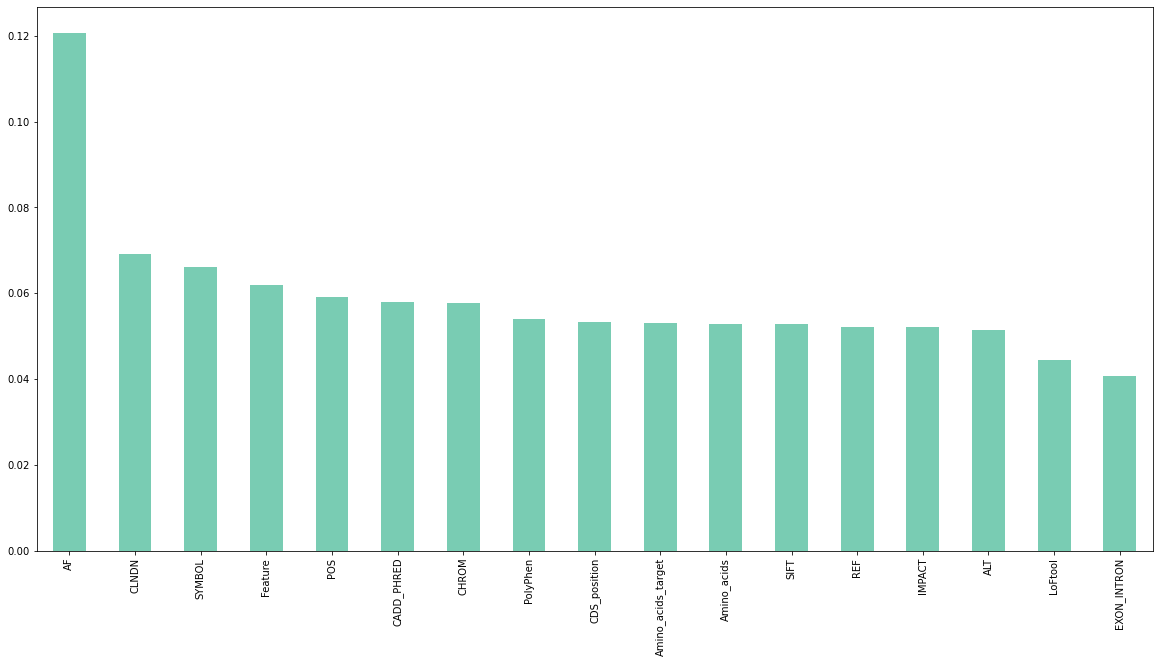

In [132]:
clc = RandomForestClassifier()
clc.fit(train_X, train_y)
features = train_X.columns
importances = clc.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20,10))
feat_importances = pd.Series(importances, index=features)
feat_importances.nlargest(len(indices)).plot(kind='bar',color = '#79CCB3');

In [133]:
f1_score(test_y, clc.predict(test_X)), accuracy_score(test_y, clc.predict(test_X))

(0.7018439716312057, 0.6923302107728337)

In [134]:
f1_score(train_y, clc.predict(train_X))

1.0

In [135]:
confusion_matrix(test_y, clc.predict(test_X))

array([[1128,  580],
       [ 471, 1237]], dtype=int64)

In [136]:
clc = HistGradientBoostingClassifier()
clc.fit(train_X, train_y)

HistGradientBoostingClassifier()

In [137]:
f1_score(test_y, clc.predict(test_X)), accuracy_score(test_y, clc.predict(test_X))

(0.7056519306099608, 0.6920374707259953)

In [138]:
f1_score(train_y, clc.predict(train_X))

0.7782391442043775

In [139]:
confusion_matrix(test_y, clc.predict(test_X))

array([[1103,  605],
       [ 447, 1261]], dtype=int64)

array([[<AxesSubplot:title={'center':'CHROM'}>,
        <AxesSubplot:title={'center':'POS'}>,
        <AxesSubplot:title={'center':'REF'}>,
        <AxesSubplot:title={'center':'ALT'}>],
       [<AxesSubplot:title={'center':'CLNDN'}>,
        <AxesSubplot:title={'center':'IMPACT'}>,
        <AxesSubplot:title={'center':'SYMBOL'}>,
        <AxesSubplot:title={'center':'Feature'}>],
       [<AxesSubplot:title={'center':'CDS_position'}>,
        <AxesSubplot:title={'center':'Amino_acids'}>,
        <AxesSubplot:title={'center':'SIFT'}>,
        <AxesSubplot:title={'center':'PolyPhen'}>],
       [<AxesSubplot:title={'center':'LoFtool'}>,
        <AxesSubplot:title={'center':'CADD_PHRED'}>,
        <AxesSubplot:title={'center':'Amino_acids_target'}>,
        <AxesSubplot:title={'center':'AF'}>],
       [<AxesSubplot:title={'center':'EXON_INTRON'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

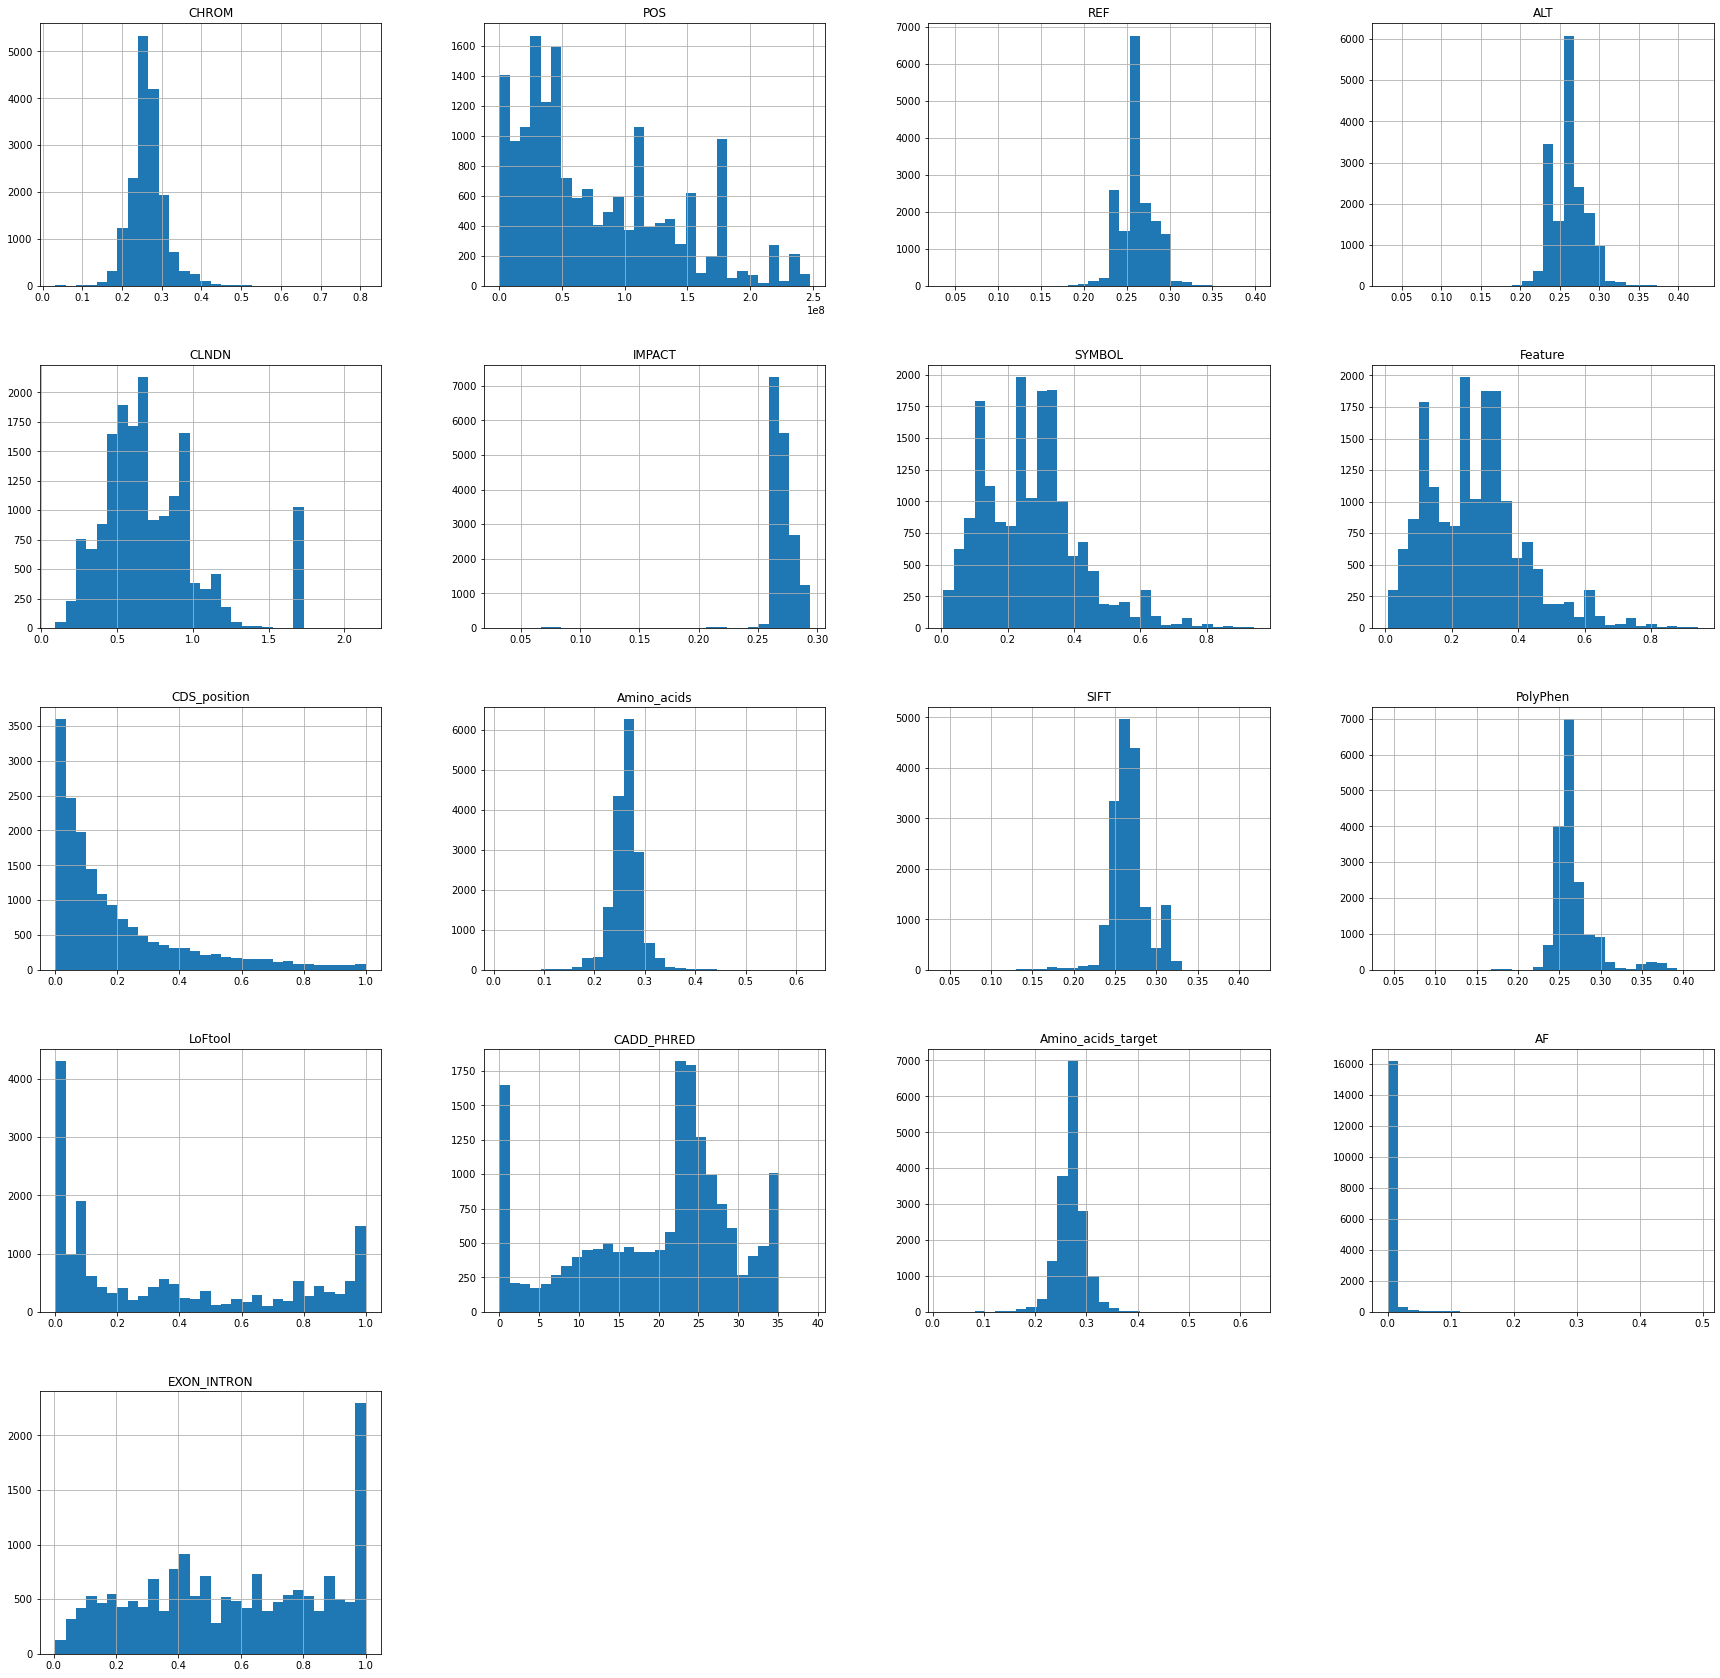

In [140]:
X.hist(bins=30, figsize=(30, 30))

Vamos a normalizar algunas variables

In [141]:
normalize_class = ["POS","CLNDN","AF","CADD_PHRED"]
X_norm = X.copy()
X_norm[normalize_class] = MinMaxScaler().fit_transform(X_norm[normalize_class])
X_norm

,CHROM,POS,REF,ALT,CLNDN,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,EXON_INTRON
8,0.031805,0.012966,0.042406,0.084813,0.366693,0.031805,0.084813,0.084813,0.212261,0.254438,0.042406,0.042406,0.101000,0.291264,0.254438,0.006084,0.882353
10,0.125444,0.023388,0.156805,0.250888,0.395671,0.125444,0.127219,0.127219,0.229612,0.254438,0.127219,0.254438,0.021000,0.669222,0.254438,0.003853,0.866667
11,0.204949,0.023394,0.250493,0.375740,0.264843,0.204949,0.418146,0.418146,0.213868,0.254438,0.127219,0.063609,0.021000,0.173645,0.254438,0.007280,0.800000
19,0.171286,0.023545,0.036348,0.031805,0.258032,0.171286,0.204949,0.204949,0.118951,0.127219,0.179205,0.313609,0.021000,0.597426,0.254438,0.020807,0.500000
21,0.202592,0.023547,0.250341,0.361604,0.264843,0.202592,0.250341,0.250341,0.104171,0.084813,0.179205,0.139382,0.021000,0.285110,0.084813,0.005273,0.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28814,0.326683,0.030068,0.262222,0.272467,0.250782,0.275601,0.348642,0.348642,0.010024,0.287981,0.270214,0.264110,0.000965,0.045565,0.281323,0.000000,0.363636
32841,0.229553,0.256255,0.233712,0.232101,0.234991,0.267204,0.205321,0.205321,0.067896,0.260435,0.267758,0.261567,0.224000,0.295879,0.253825,0.000000,0.181818
14723,0.261170,0.436357,0.276068,0.238585,0.234014,0.283960,0.147107,0.147107,0.116015,0.255899,0.281950,0.340168,0.782000,0.605118,0.282088,0.000000,0.190476
33134,0.234100,0.314952,0.258365,0.264910,0.253694,0.267695,0.301008,0.301008,0.064965,0.261047,0.269365,0.271161,0.031500,0.628196,0.285188,0.000426,0.150000


In [142]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y)

In [143]:
clc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                                   max_depth=7, random_state=0)
clc.fit(train_X, train_y)

GradientBoostingClassifier(max_depth=7, random_state=0)

In [144]:
f1_score(test_y, clc.predict(test_X)), accuracy_score(test_y, clc.predict(test_X))

(0.6952789699570815, 0.688231850117096)

In [145]:
f1_score(y, clc.predict(X)), accuracy_score(y, clc.predict(X))

(0.8468551115188349, 0.8435816350433357)

In [146]:
data = training_data[feature_importance].join(training_data["CLASS"])

In [147]:
data

,CHROM,POS,REF,ALT,CLNDN,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,EXON_INTRON,CLASS
0,0.254438,1168180,0.254438,0.254438,1.714685,0.254438,0.254438,0.254438,0.033481,0.254438,0.254438,0.254438,0.321582,1.053,0.254438,0.10020,1.000000,0
1,0.127219,1470752,0.127219,0.254438,1.005440,0.127219,0.254438,0.254438,0.032646,0.254438,0.254438,0.127219,0.313746,31.000,0.254438,0.00000,1.000000,0
3,0.084813,2160305,0.084813,0.127219,0.518053,0.084813,0.254438,0.254438,0.006362,0.254438,0.254438,0.254438,0.217631,22.500,0.254438,0.00000,0.142857,0
4,0.063609,2160305,0.063609,0.254438,0.682610,0.063609,0.127219,0.127219,0.006362,0.127219,0.127219,0.127219,0.217631,24.700,0.254438,0.00000,0.142857,0
5,0.050888,2160554,0.050888,0.127219,0.518053,0.050888,0.084813,0.084813,0.022364,0.084813,0.084813,0.084813,0.217631,23.700,0.254438,0.00000,0.142857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,0.273764,154158201,0.238140,0.239059,0.673689,0.266390,0.036348,0.036348,0.354794,0.236221,0.248368,0.248843,0.001580,0.105,0.237290,0.13923,0.538462,0
65184,0.273606,154159118,0.261164,0.262754,0.888708,0.264418,0.031805,0.031805,0.270573,0.276207,0.264995,0.261609,0.001580,0.002,0.285931,0.00130,0.538462,1
65185,0.274024,154194886,0.261199,0.262792,0.888708,0.266377,0.139382,0.139382,0.099651,0.265055,0.248361,0.248836,0.001580,12.850,0.237278,0.01110,0.307692,0
65186,0.273867,154490187,0.238113,0.235708,0.530278,0.266365,0.254438,0.254438,0.049780,0.254497,0.248354,0.248829,0.255614,0.130,0.237266,0.00030,1.000000,0


In [148]:
normalize_class = ["POS","CLNDN","AF","CADD_PHRED"]
data[normalize_class] = MinMaxScaler().fit_transform(data[normalize_class])

In [149]:
data

,CHROM,POS,REF,ALT,CLNDN,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,EXON_INTRON,CLASS
0,0.254438,0.004160,0.254438,0.254438,0.800189,0.254438,0.254438,0.254438,0.033481,0.254438,0.254438,0.254438,0.321582,0.012988,0.254438,0.203204,1.000000,0
1,0.127219,0.005382,0.127219,0.254438,0.469175,0.127219,0.254438,0.254438,0.032646,0.254438,0.254438,0.127219,0.313746,0.382708,0.254438,0.000000,1.000000,0
3,0.084813,0.008169,0.084813,0.127219,0.241705,0.084813,0.254438,0.254438,0.006362,0.254438,0.254438,0.254438,0.217631,0.277769,0.254438,0.000000,0.142857,0
4,0.063609,0.008169,0.063609,0.254438,0.318506,0.063609,0.127219,0.127219,0.006362,0.127219,0.127219,0.127219,0.217631,0.304930,0.254438,0.000000,0.142857,0
5,0.050888,0.008170,0.050888,0.127219,0.241705,0.050888,0.084813,0.084813,0.022364,0.084813,0.084813,0.084813,0.217631,0.292584,0.254438,0.000000,0.142857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,0.273764,0.622378,0.238140,0.239059,0.314342,0.266390,0.036348,0.036348,0.354794,0.236221,0.248368,0.248843,0.001580,0.001284,0.237290,0.282357,0.538462,0
65184,0.273606,0.622382,0.261164,0.262754,0.414694,0.264418,0.031805,0.031805,0.270573,0.276207,0.264995,0.261609,0.001580,0.000012,0.285931,0.002636,0.538462,1
65185,0.274024,0.622526,0.261199,0.262792,0.414694,0.266377,0.139382,0.139382,0.099651,0.265055,0.248361,0.248836,0.001580,0.158632,0.237278,0.022511,0.307692,0
65186,0.273867,0.623720,0.238113,0.235708,0.247411,0.266365,0.254438,0.254438,0.049780,0.254497,0.248354,0.248829,0.255614,0.001593,0.237266,0.000608,1.000000,0


In [150]:
data.to_csv("ready_model.csv")